In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
url="https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"


In [3]:
df=pd.read_csv(url,names=['sepal lenght','sepal width','petal length','petal width','target'])
df.head()

,sepal lenght,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
features=['sepal lenght','sepal width','petal length','petal width']
x=df.loc[:,features].values

In [5]:
y=df.loc[:,['target']].values

In [6]:
x=StandardScaler().fit_transform(x)

In [7]:
pd.DataFrame(data=x,columns=features).head()

,sepal lenght,sepal width,petal length,petal width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [8]:
pca=PCA(n_components=2)
principalComponents=pca.fit_transform(x)

In [9]:
principalDf=pd.DataFrame(data=principalComponents,columns=['principal component 1','principal component 2'])


In [10]:
principalDf.head(5)

,principal component 1,principal component 2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


In [11]:
df[['target']].head(5)

,target
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


In [12]:
findDf=pd.concat([principalDf,df[['target']]],axis=1)
findDf.head(5)

,principal component 1,principal component 2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


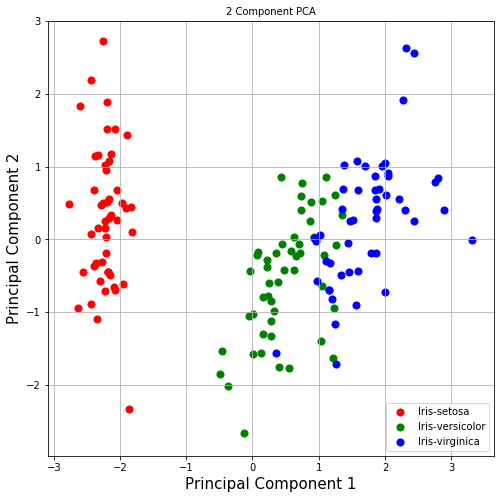

In [19]:
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(1,1,1)
ax.set_xlabel("Principal Component 1",fontsize=15)
ax.set_ylabel('Principal Component 2',fontsize=15)
ax.set_title('2 Component PCA',fontsize=10)

targets=["Iris-setosa",'Iris-versicolor','Iris-virginica']
colors=['r','g','b']
for target,color in zip(targets,colors):
    indicesTokeep=findDf['target']==target
    ax.scatter(findDf.loc[indicesTokeep,'principal component 1'],findDf.loc[indicesTokeep,'principal component 2'],c=color,s=50)
ax.legend(targets)
ax.grid()

PCA= principal component analysis